# Introduction

wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information.

#### Key Points
##### Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling.
- the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

# Part one: Data Wrangling:

## a-  Gathering Data

In [559]:
# package to be used in the project...
import pandas as pd
import numpy as np
import requests
import os
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### `First`: Gathering data from "twitter-archive-enhanced.csv" which is download manually :

In [4]:
#Read CSV file...
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### `Second`: Gathering data from "image_predictions.tsv" that will be downloaded programmatically using the Requests library:

In [5]:
#Download URL programatically...
image_predictions_url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file...
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

### `Third`: Gathering data from query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called "tweet_json.txt" file:


In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'MY API KEY'
consumer_secret = 'MY API SECRET'
access_token = 'MY TOKEN ACCESS'
access_secret = 'MY TOKEN SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [114]:
print('Count of fails = ',len(fails_dict))
print('Count of all retrieved rows = ', count) 
print('It takes around {} seconds ({} minutes approximatly) to gathering data from query the Twitter API.'\
      .format(int(end), int(end/60)))

Count of fails =  25
Count of all retrieved rows =  2356
It takes around 2199 seconds (36 minutes approximatly) to gathering data from query the Twitter API.


In [6]:
with open('tweet_json.txt', 'r') as file:
    tweet_data = pd.read_json(file, lines= True, encoding = 'utf-8')


## b- Assessing Data: 


In [7]:
# View the first rows of the table.
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# View the last 5 rows of the table.
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
#view name of columns,them data type, count of non null values, counts of rows and columns.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# view the count of each value in the name columns
dict(twitter_archive.name.value_counts())

{'None': 745,
 'a': 55,
 'Charlie': 12,
 'Oliver': 11,
 'Lucy': 11,
 'Cooper': 11,
 'Penny': 10,
 'Lola': 10,
 'Tucker': 10,
 'Bo': 9,
 'Winston': 9,
 'the': 8,
 'Sadie': 8,
 'an': 7,
 'Bailey': 7,
 'Toby': 7,
 'Buddy': 7,
 'Daisy': 7,
 'Milo': 6,
 'Scout': 6,
 'Jax': 6,
 'Leo': 6,
 'Bella': 6,
 'Stanley': 6,
 'Koda': 6,
 'Jack': 6,
 'Rusty': 6,
 'Oscar': 6,
 'Dave': 6,
 'Alfie': 5,
 'Phil': 5,
 'Finn': 5,
 'Sammy': 5,
 'very': 5,
 'George': 5,
 'Oakley': 5,
 'Gus': 5,
 'Chester': 5,
 'Sunny': 5,
 'Larry': 5,
 'Louis': 5,
 'Bentley': 5,
 'Clark': 4,
 'Hank': 4,
 'one': 4,
 'Maddie': 4,
 'quite': 4,
 'Reginald': 4,
 'Shadow': 4,
 'Jerry': 4,
 'Jeffrey': 4,
 'Carl': 4,
 'Boomer': 4,
 'Sophie': 4,
 'Moose': 4,
 'Gary': 4,
 'Ruby': 4,
 'just': 4,
 'Scooter': 4,
 'Riley': 4,
 'Reggie': 4,
 'Sampson': 4,
 'Maximus': 4,
 'Archie': 4,
 'Duke': 4,
 'Beau': 4,
 'Bear': 4,
 'Dexter': 4,
 'Cassie': 4,
 'Brody': 4,
 'Clarence': 4,
 'Winnie': 4,
 'Gerald': 4,
 'Maggie': 4,
 'Loki': 4,
 'Bruce': 4,
 

In [11]:
# view all names which isn't in title case.
df = twitter_archive[twitter_archive['name'].str.istitle()==False]
df['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
mad              2
actually         2
getting          2
CeCe             2
not              2
incredibly       1
officially       1
old              1
light            1
this             1
DonDon           1
DayZ             1
his              1
life             1
JD               1
such             1
all              1
my               1
space            1
unacceptable     1
BeBe             1
by               1
infuriating      1
Name: name, dtype: int64

In [12]:
# values counts for doggo column.
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
# values counts for floofer column.
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [14]:
# values counts for pupper column.
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [15]:
# values counts for puppo column.
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
#view value_counts for source column.
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
#print a sample of text column( the first 10 values)
list(twitter_archive.text)[0:10]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

In [18]:
#print the value counts for rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
##print the unique values for rating_numerator
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [20]:
##print the value counts for rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# print the count of rating_denominator not equal to 10.

Denominator_not_equal_10 = twitter_archive[twitter_archive['rating_denominator']!=10]
Denominator_not_equal_10.rating_denominator.size

23

In [22]:
# print the unique values of rating_denominator.
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [23]:
#check for duplications
sum(twitter_archive.duplicated())

0

In [24]:
#view the first 5 rows of image_prediction table.
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
# print image_prediction columns name, them data type, and count of rows and columns
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# check for duplicated values
sum(image_prediction.duplicated())

0

In [27]:
# print the sum of duplicated value in jpg_url column.
sum(image_prediction['jpg_url'].duplicated())

66

In [28]:
#print value coumts for dog type of first prediction
image_prediction.p1.value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

In [29]:
#print value coumts for dog type of second prediction
image_prediction.p2.value_counts().head(10)

Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
French_bulldog               41
Chesapeake_Bay_retriever     41
toy_poodle                   37
cocker_spaniel               34
Siberian_husky               33
Name: p2, dtype: int64

In [30]:
#print value coumts for dog type of third prediction
image_prediction.p3.value_counts().head(10)

Labrador_retriever           79
Chihuahua                    58
golden_retriever             48
Eskimo_dog                   38
kelpie                       35
kuvasz                       34
chow                         32
Staffordshire_bullterrier    32
beagle                       31
cocker_spaniel               31
Name: p3, dtype: int64

In [31]:
# print a sample of  tweet_data table
tweet_data.sample(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1572,NaN,NaN,2016-01-10 20:41:33,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,3924,False,When bae calls your name from across the room....,NaN,...,NaN,NaN,NaN,NaN,1625,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1356,NaN,NaN,2016-02-21 01:19:47,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 701214695424991232, 'id_str'...",11931,False,"I'm not sure what's happening here, but it's p...",NaN,...,NaN,NaN,NaN,NaN,4961,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1201,NaN,NaN,2016-03-27 17:25:54,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 714141403652231168, 'id_str'...",4209,False,"I know we only rate dogs, but since it's Easte...",NaN,...,NaN,NaN,NaN,NaN,1357,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
# print column names and shape of tweet_data table
tweet_data.columns, tweet_data.shape

(Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
        'entities', 'extended_entities', 'favorite_count', 'favorited',
        'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id', 'in_reply_to_status_id_str',
        'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
        'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
        'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
        'quoted_status_permalink', 'retweet_count', 'retweeted',
        'retweeted_status', 'source', 'truncated', 'user'],
       dtype='object'),
 (2331, 32))

#### I need only three columns from tweet_data which are ('id','retweet_count', and 'favorite_count')

In [33]:
# include only the needed columns of the tweet data table
tweets_data=tweet_data.loc[ : ,['id','favorite_count','retweet_count']]

In [34]:
# print some statistics of tweet_data
tweets_data.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7427.853711,2644.058344
std,6.823170e+16,11533.734172,4471.545437
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1292.000000,536.000000
50%,7.182469e+17,3227.000000,1236.000000
75%,7.986692e+17,9087.500000,3066.500000
max,8.924206e+17,153334.000000,75972.000000


In [35]:
# print tweet data column names , datatype and count of rows and columns
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [36]:
# count of rows which contain zero value for the favorite_count column
print('count of rows which contain zero value for the favorite_count column: ',\
      tweets_data[tweets_data['favorite_count']==0].count()[1])

count of rows which contain zero value for the favorite_count column:  163


In [37]:
# count of rows which contain zero value for the retweet_count column
print('count of rows which contain zero value for the retweet_count column: ',\
      tweets_data[tweets_data['retweet_count']==0].count()[1])

count of rows which contain zero value for the retweet_count column:  0


In [38]:
# check for duplicated values
sum(tweets_data.duplicated())

0

#### Quality
##### `twitter_archive` table
- tweet_id is int instead of being a string.
- Each of( in_reply_to_status_id , and in_reply_to_user_id, retweeted_status_id,in_reply_to_status_id) is float not a string.
- "in_reply_to_status_id" and "in_reply_to_user_id" have only 78 non null values.
- "retweeted_status_id" and "retweeted_status_user_id" have only 181 non null values.
- Nulls represented as 'None' in each of doggo,floofer,pupper, and puppo.
- doggos has 2259 value equal to 'None'.
- floofer has 2346 value equal to 'None'.
- pupper has 2099 value equal to 'None'.
- puppo has 2326 value equal to 'None'.
- expanded_url column has 59 missing values. 
- Nulls represented as 'None' in name column.
- lowercase names have unsuitable data like (all, the , a , an , by , old, not, his, this..... )
- Capitalize the rest of lowercase.
- name ='O' has to be replaced with Nan.
- some of rating_numerators and rating_denominators values are incorrect.
- rating_numerators and rating_denominators is int instead of float.
- timestamp is object instead of being datetime type.

##### `image_prediction` table
- tweet_id is int not a string.
- jpg_url column has duplicated photos (66 row are duplicated) have to be removed
- it includes 2074 row, there are some missing rows comparing to  `twitter_archive` rows'counts(2356 row).
- rows with p1_dog, p2_dog and p3_dog with False value should be removed

##### `tweet_data` table
- id is int not a string.
- the 'id' column should be renamed to "tweet_id" to match the other 2 tables.
- it includes 2331 row, there are missing rows comparing to  `twitter_archive` rows'counts (2356 row).

#### Tidiness 
##### `twitter_archive` table
- Combine (Doggo, floofer, pupper, puppo) in one column named dog_type.
- Dropping uneeded columuns ( in_reply_to_status_id' , 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','expanded_urls','source')
- Combine rating_numerator and rating_denominator one column in twitter_archive_clean.

##### `image_prediction` table
- The first True prediction for all image will be saved to new column (dog_type)with its confidence in another column named (confidence_degree).
- Dropping uneeded columns.
- - Combine `image_prediction` with `twitter_archive` using tweet_id.

##### `tweets_data` table
- Combine `tweets_data` with `twitter_archive` using tweet_id.

## c-  Cleaning Data:

In [377]:
# make a copy of the original data frames.

twitter_archive_clean= twitter_archive.copy()
image_prediction_clean= image_prediction.copy()
tweet_data_clean=tweets_data.copy()

### Detect and document at least eight (8) quality issues and two (2) tidiness issues

#### `twitter_archive` table : 
 #### Define:
 
>1- change tweet_id  data type to string:

#### Code:

In [378]:
twitter_archive_clean['tweet_id']= twitter_archive_clean['tweet_id'].astype('str')

#### Test:

In [379]:
twitter_archive_clean['tweet_id'].dtypes

dtype('O')

#### Define:
 >2- change rating_denominator, rating_nominator data type to float:

#### Code:

In [380]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test:

In [381]:
print ('data type of rating_numerator is:  {} , and the data type of rating_denominator is: {} '\
       .format( twitter_archive_clean['rating_numerator'].dtype,twitter_archive_clean['rating_denominator'].dtype))

data type of rating_numerator is:  float64 , and the data type of rating_denominator is: float64 


#### Define:
> 3- Replace all None name with Nan.

#### code:

In [382]:
# define function to replace None with Nan:
#------------------------------------------

def remove_None(col_name):
    twitter_archive_clean[col_name].replace("None", np.nan, inplace = True)

In [383]:
remove_None('name')

#### Test:

In [384]:
print('Count of columns which contain None value in (name) column is :  ',\
      len(twitter_archive_clean[twitter_archive_clean['name'] == "None"].index))

Count of columns which contain None value in (name) column is :   0


#### Define:
> 4- Replace all 'None' values with Nan in each of doggo,floofer,pupper, and puppo

#### Code:

In [385]:
stage_of_dogs=['doggo','floofer','pupper','puppo']
for stage in stage_of_dogs:
    remove_None(stage)

#### Test:

In [386]:
for stage in stage_of_dogs: 
    print('Count of columns which contain None value in ( ' +stage +' ) column is :  ',\
      len(twitter_archive_clean[twitter_archive_clean[stage] == "None"].index))

Count of columns which contain None value in ( doggo ) column is :   0
Count of columns which contain None value in ( floofer ) column is :   0
Count of columns which contain None value in ( pupper ) column is :   0
Count of columns which contain None value in ( puppo ) column is :   0


#### Define:
> 5- Convert timestamp data type from object datetime.    

#### Code:

In [387]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test:

In [388]:
twitter_archive_clean['timestamp'].dtype

dtype('<M8[ns]')

#### Define:
> 6- Fill unsuitable lowercase names with Nan:

#### Code:

In [389]:
not_name_lowercase=['such', 'a', 'quite', 'not' ,'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my',
 'his', 'actually' ,'getting', 'this', 'unacceptable', 'all', 'old',
 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']
for name in not_name_lowercase:
    twitter_archive_clean.replace(not_name_lowercase, value=np.nan, inplace= True)


#### Test:

In [390]:
# Check that the count of lowercase names =zero...
print('Count of lowercase names = ',len(twitter_archive_clean[twitter_archive_clean.name.str.islower()==True]))

Count of lowercase names =  0


#### Test:

#### Define:
> 7- Replace name="O" with nan:

#### Code:

In [391]:
twitter_archive_clean['name'].replace('O',np.nan,inplace=True)

#### Test:

In [392]:
#check thant name with value 'O' is not exist...
twitter_archive_clean[twitter_archive_clean['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define:
> 8- Correct wrong values for denomirator_rate:

#### Code:

##### First: View all the text for (rating_denominator) not equal to 10 to check both the value of rating_denominator, and rating_denominator

In [393]:
denominator_not_10=twitter_archive_clean[twitter_archive_clean['rating_denominator'] !=10]
denominator_not_10= denominator_not_10.loc[:, ['tweet_id','text','rating_numerator','rating_denominator']]
print('Count of rows with rating_denominator not equal to 10 is : ', len(denominator_not_10),\
      '\n -----------------------------------------------------------------')
list(denominator_not_10.values)

Count of rows with rating_denominator not equal to 10 is :  23 
 -----------------------------------------------------------------


[array(['835246439529840640',
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960.0, 0.0], dtype=object),
 array(['832088576586297345', '@docmisterio account started on 11/15/15',
        11.0, 15.0], dtype=object),
 array(['820690176645140481',
        'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        84.0, 70.0], dtype=object),
 array(['810984652412424192',
        'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
        24.0, 7.0], dtype=object),
 array(['775096608509886464',
        'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
        9.0, 11.0], dtype=object),
 array(['758467244762497024',
        'Why does this never happen at my fr


#### The following are the incorrect rating_denominator and rating_numerator in the dataframe
#### which contains all  rating_denominator not equal to (10) 
-------------------------------------------------------------------------------------------------
- '835246439529840640', '722974582966214656' -->13/10
- '716439118184652801' -->11/10
- '775096608509886464', '740373189193256964' 14/10 has the same text with diffrenet tweet_id
- '832088576586297345', '810984652412424192', has no rate
- '820690176645140481' 84/70 (divide by 7) -->12/10
- '758467244762497024' 165/150 --> 11/10
- '731156023742988288' 204/170 squad of doggos -->12/10
- '713900603437621249' 99/90  (9 puppers) --> 11/10
- '710658690886586372' 88/80 (brigade of puppers) -->11/10
- '709198395643068416' 45/50 (5 dogs) -->9/10
- '704054845121142784' 60/50 (flock of 6 puppers) --> 12/10
- '697463031882764288' 44/40 (bucket of 4 pups) --> 11/10
- '686035780142297088' 4/20 (more than one pup) --> 2/10
- '684225744407494656' 143/130 (2 pups) --> 11/10
- '684222868335505415' 121/110 (several puppers) --> 11/10
- '682962037429899265' --> 10/10
- '682808988178739200' 20/16 --> wrong rate irresponisble
- '677716515794329600' 144/120 --> 12/10
- '675853064436391936' 88/80 (platoon of puppers) --> 11/10
- '666287406224695296' -->9/10

#####  Second: 
- Define function (view_rating) to view  incorrect rates.
- Define function (update_rating) to correct numinator and denominator rating for all rows that have rating_denominator not equal to 10. 

In [394]:
#reference: https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

def view_rating(tweet_list):
    df=twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(tweet_list) ,\
                          ['rating_numerator','rating_denominator']]
    return df 

def update_rating(tweet_list,correct_rate):
    df_update= twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(tweet_list) , \
                          ['rating_numerator','rating_denominator']] =correct_rate
    

##### Third: Correct numerator and denomirator for all rows which rating_denomirator not equal 10.

##### --> update rating to 13/10: 

In [395]:
tweet_list_13 = ['835246439529840640','722974582966214656']
view_rating(tweet_list_13)

,rating_numerator,rating_denominator
313,960.0,0.0
1165,4.0,20.0


In [396]:
new_rate_13=[13,10]
update_rating(tweet_list_13,new_rate_13)

#### Test:

In [397]:
view_rating(tweet_list_13)

,rating_numerator,rating_denominator
313,13.0,10.0
1165,13.0,10.0


##### --> update rating to 11/10: 

#### Code:

In [398]:
tweet_list_11=['716439118184652801','758467244762497024','713900603437621249',\
               '710658690886586372','697463031882764288','684225744407494656',\
               '684222868335505415','675853064436391936']
view_rating(tweet_list_11)

,rating_numerator,rating_denominator
902,165.0,150.0
1202,50.0,50.0
1228,99.0,90.0
1254,80.0,80.0
1433,44.0,40.0
1634,143.0,130.0
1635,121.0,110.0
1843,88.0,80.0


In [399]:
new_rate_11= [11,10]
update_rating(tweet_list_11,new_rate_11)

#### Test:

In [400]:
view_rating(tweet_list_11)

,rating_numerator,rating_denominator
902,11.0,10.0
1202,11.0,10.0
1228,11.0,10.0
1254,11.0,10.0
1433,11.0,10.0
1634,11.0,10.0
1635,11.0,10.0
1843,11.0,10.0



##### --> Update rating to 12/10: 

#### Code:

In [401]:
tweet_list_12=['820690176645140481','731156023742988288','704054845121142784','677716515794329600']
view_rating(tweet_list_12)

,rating_numerator,rating_denominator
433,84.0,70.0
1120,204.0,170.0
1351,60.0,50.0
1779,144.0,120.0


In [402]:
new_rate_12=[12,10]
update_rating(tweet_list_12,new_rate_12)

#### Test:

In [403]:
view_rating(tweet_list_12)

,rating_numerator,rating_denominator
433,12.0,10.0
1120,12.0,10.0
1351,12.0,10.0
1779,12.0,10.0


##### -->  Update rating to 14/10: 

#### Code:

In [404]:
# '775096608509886464', '740373189193256964' mistaken value as it return to date 11/9, 
# after revising the text I found the correct rate is 14/10 and both have the same text with diffrenet tweet_id 

tweet_list_14=['775096608509886464','740373189193256964']
view_rating(tweet_list_14)

,rating_numerator,rating_denominator
784,9.0,11.0
1068,9.0,11.0


In [405]:
new_rate_14= [14,10]
update_rating(tweet_list_14,new_rate_14)

### Test:

In [406]:
view_rating(tweet_list_14)

,rating_numerator,rating_denominator
784,14.0,10.0
1068,14.0,10.0


##### --> Update rating to 9/10, 10/10, and 2/10: 

### code:

In [407]:
# correcting for rates 9/10, 10/10, 2/10...
rest_tweet_list=['666287406224695296','709198395643068416','686035780142297088','682962037429899265']
view_rating(rest_tweet_list)

,rating_numerator,rating_denominator
1274,45.0,50.0
1598,4.0,20.0
1662,7.0,11.0
2335,1.0,2.0


In [408]:
rest_new_rate= ([9,10],[9,10],[2,10],[10,10])
update_rating(rest_tweet_list,rest_new_rate)

#### Test:

In [409]:
view_rating(rest_tweet_list)

,rating_numerator,rating_denominator
1274,9.0,10.0
1598,9.0,10.0
1662,2.0,10.0
2335,10.0,10.0


##### -->  drop unrated rows: 

#### Code:

In [410]:
'''
    After revising the text for both of thiese rows , 
    I found that they have not actual rating for tweet_id= (832088576586297345', '810984652412424192')
   
    this row with tweet_id ='682808988178739200' should be dropped too as in text , 
    it was written that this rate (20/16) is irresponisble...
'''
#----------------------------------------------------------------------------------------------
unrated_tweet_list=['832088576586297345','810984652412424192','682808988178739200']
view_rating(unrated_tweet_list)

,rating_numerator,rating_denominator
342,11.0,15.0
516,24.0,7.0
1663,20.0,16.0


In [411]:
twitter_archive_clean.drop(index=[342,516,1663], inplace=True)

#### Test:

In [412]:
# Check they are deleted from the table...
view_rating(unrated_tweet_list)

,rating_numerator,rating_denominator


#### Test:
#### Finally we check the value_counts for rating_denominator equal to 10.0:

In [413]:
twitter_archive_clean['rating_denominator'].value_counts()

10.0    2353
Name: rating_denominator, dtype: int64

#### Define:
> 9- Correct the rest values of rating numerator

#### Code:

##### First : View all text for all rows with rating_numerator greater or equal to 20:

In [414]:
numerator_greater_20=twitter_archive_clean[twitter_archive_clean['rating_numerator'] >= 20]
numerator_greater_20= numerator_greater_20.loc[:, ['tweet_id','text','rating_numerator','rating_denominator']]
print('Count of rows with rating_numerator greater or equal to 20 is: ', len(numerator_greater_20),\
     '\n -----------------------------------------------------------------')
list(numerator_greater_20.values)

Count of rows with rating_numerator greater or equal to 20 is:  9 
 -----------------------------------------------------------------


[array(['855862651834028034',
        '@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
        420.0, 10.0], dtype=object),
 array(['855860136149123072',
        '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
        666.0, 10.0], dtype=object),
 array(['838150277551247360', '@markhoppus 182/10', 182.0, 10.0],
       dtype=object),
 array(['832215909146226688',
        "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
        75.0, 10.0], dtype=object),
 array(['786709082849828864',
        "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
        75.0, 10.0], dtype=object),
 array(['778027034220126208',
        "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears

####  Note:
##### the following tweet_ids are for the incorrect value of rating_numerator which I will correct it:
----------------------------------------------------------------------------
- '832215909146226688','786709082849828864' -->9.75/10
- '778027034220126208' -->11.27
- '680494726643068929' --> 11.26

##### the following tweet_ids are for the incorrect value of rating_numerator and after revising them text , I found the same values..so I will drop these rows as they are just four observations and it won't have affect my analysis.
----------------------------------------------------------------------------
- '855860136149123072' 666/10
- '670842764863651840' 420/10
- '855862651834028034' 420/10
- '749981277374128128' 1776/10
- '838150277551247360' 182/10

##### Second: Update  incorrect rating_numerator:

In [415]:
tweet_incorrect_numerator=['832215909146226688','786709082849828864','778027034220126208','680494726643068929']
view_rating(tweet_incorrect_numerator)

,rating_numerator,rating_denominator
340,75.0,10.0
695,75.0,10.0
763,27.0,10.0
1712,26.0,10.0


In [416]:
new_rating = ([9.75,10],[9.75,10],[11.27,10],[11.26,10])
update_rating(tweet_incorrect_numerator,new_rating)

#### Test:

In [417]:
view_rating(tweet_incorrect_numerator)

,rating_numerator,rating_denominator
340,9.75,10.0
695,9.75,10.0
763,11.27,10.0
1712,11.26,10.0


#### Code:

##### --> Drop rows with wrong rating_numerator:

In [418]:
dropped_tweets=['855860136149123072','670842764863651840','749981277374128128','838150277551247360','855862651834028034']
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(dropped_tweets) ,\
                          ['tweet_id','rating_numerator','rating_denominator']]


,tweet_id,rating_numerator,rating_denominator
188,855862651834028034,420.0,10.0
189,855860136149123072,666.0,10.0
290,838150277551247360,182.0,10.0
979,749981277374128128,1776.0,10.0
2074,670842764863651840,420.0,10.0


In [419]:
twitter_archive_clean.drop(index=[188,189,290,979,2074],inplace=True)

#### Test:

In [420]:
#check there isn't rows with those index
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(dropped_tweets) ,\
                          ['tweet_id','rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator


#### Code:
##### --> drop rows with rating_numerator=0 

In [421]:
zero_numerator= twitter_archive_clean[twitter_archive_clean['rating_numerator']==0]
print('index of rows with zero rating_numerator:  ')
zero_numerator['rating_numerator']

index of rows with zero rating_numerator:  


315     0.0
1016    0.0
Name: rating_numerator, dtype: float64

In [422]:
twitter_archive_clean.drop(index=[315,1016],inplace=True)

#### Test:

In [423]:
print('Count of rows with zero rating_numerator is : ',\
      len(twitter_archive_clean[twitter_archive_clean['rating_numerator']==0]))

Count of rows with zero rating_numerator is :  0


#### Test:
##### Finally, check for all values for rating_numenator.

In [424]:
twitter_archive_clean['rating_numerator'].unique()

array([13.  , 12.  , 14.  ,  5.  , 17.  , 11.  , 10.  ,  6.  , 15.  ,
        9.75,  7.  ,  9.  ,  8.  ,  1.  , 11.27,  3.  ,  4.  ,  2.  ,
       11.26])

##### `image_prediction` table
#### Define:
 >10- Change tweet_id  data type to string:

#### Code:

In [425]:
image_prediction_clean['tweet_id']= image_prediction_clean['tweet_id'].astype('str')

#### Test:

In [426]:
image_prediction_clean['tweet_id'].dtype

dtype('O')

#### Define:
> 11- Drop duplicated rows where jpg_url values are duplicated (there are 66 duplicated image)

#### Code:

In [427]:
#before drop columns , check for the actual size of the table
image_prediction_clean.shape

(2075, 12)

In [428]:
# Drop rows with duplicated image  
image_prediction_clean.drop_duplicates(subset='jpg_url',inplace=True)

#### Test:

In [429]:
#check for the new shape of the table after dropping duplicated rows
image_prediction_clean.shape

(2009, 12)

#### Define:
> 12- Drop rows with p1_dog, p2_dog and p3_dog with False


#### Code:

In [430]:
#Reference: https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

false_predictions = image_prediction_clean[ (image_prediction_clean['p1_dog'] ==False)\
                                           & (image_prediction_clean['p2_dog'] ==False)\
                                           & (image_prediction_clean['p3_dog'] ==False)].index

print('Count of all rows with false prediction for p1_dog, p2_dog and p3_dog is: ', false_predictions.shape[0])

Count of all rows with false prediction for p1_dog, p2_dog and p3_dog is:  318


In [431]:
# drop these given row from dataFrame 
image_prediction_clean.drop(false_predictions, inplace = True) 

#### Test:

In [432]:
print('Count of all rows after deleting all rows with false prediction for p1_dog, p2_dog and p3_dog is: ',\
      image_prediction_clean.shape[0])

Count of all rows after deleting all rows with false prediction for p1_dog, p2_dog and p3_dog is:  1691


##### `tweet_data` table
#### Define:
 >13- Change tweet_id  data type to string:

#### Code:

In [433]:
tweet_data_clean['id']= tweet_data_clean['id'].astype('str')

#### Test:

In [434]:
tweet_data_clean['id'].dtype

dtype('O')

#### Define:
 >14- Rename (id) column to (tweet_id) to match the other tables

#### Code:

In [455]:
tweet_data_clean = tweet_data_clean.rename(index=str, columns={"id": "tweet_id"})

#### Test: 

In [456]:
tweet_data_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

#### Tidiness 
##### `twitter_archive` table


#### Define:
 >1- Drop unneeded columns which are columns relevant to retweets and replies, because we only want original tweets with images 
and most of values for these columns are Nan.

#### Code:

In [435]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id' ,'retweeted_status_timestamp',\
                                    'in_reply_to_user_id','retweeted_status_id',
                                    'retweeted_status_user_id','expanded_urls','source'], 
                                    axis=1, inplace=True)

#### Test:

In [436]:
print('-->> Columns of twitter_archive_clean after dropping some columns are:\n {}\n -->> Count of columns is {} column.'\
      .format(twitter_archive_clean.columns,len(twitter_archive_clean.columns)))


-->> Columns of twitter_archive_clean after dropping some columns are:
 Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
 -->> Count of columns is 10 column.


#### Define:
> 2- Combine (Doggo, floofer, pupper, puppo) in one column named dog_type using melt function to merge these four columns in one columns named "dogs_stage".

#### Code:

In [438]:
# reference: https://www.geeksforgeeks.org/python-pandas-melt/
''' - Using melt function to combine (Doggo, floofer, pupper, puppo) in "dogs_stage" column...
    - Combining the four columns and save its values in (dogs_stage) column and variable name in (dogs) column.
    - Drop (dogs) column.
    - Sort twitter_archive_clean in ascending order to be able to drop duplicated rows according to (tweet_id)
'''
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'text', 
       'rating_numerator', 'rating_denominator', 'name'], var_name='dogs',value_name='dogs_stage')

In [439]:
twitter_archive_clean = twitter_archive_clean.drop('dogs',axis= 1)

In [440]:
twitter_archive_clean=twitter_archive_clean.sort_values('dogs_stage')

In [441]:
twitter_archive_clean.drop_duplicates(subset='tweet_id',keep='first', inplace=True )

#### Test:

In [442]:
twitter_archive_clean.dogs_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dogs_stage, dtype: int64

#### Test:

#### Define:
> 3- Create new column 'rate': 

#### Code:

In [443]:
twitter_archive_clean['rate']=(twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator'])*10

#### Test:

In [444]:
twitter_archive_clean['rate'].value_counts()

12.00    562
11.00    471
10.00    462
13.00    353
9.00     158
8.00     102
14.00     56
7.00      54
5.00      37
6.00      32
3.00      19
4.00      15
2.00      10
1.00       8
9.75       2
15.00      2
17.00      1
11.27      1
11.26      1
Name: rate, dtype: int64

#### Define:
>  Round up the rate value and convert it to integer:

#### Code:

In [445]:
# Reference: https://datatofish.com/round-values-pandas-dataframe/
twitter_archive_clean['rate'] = twitter_archive_clean['rate'].apply(np.ceil).astype('int') 

#### test:

In [446]:
twitter_archive_clean['rate'].value_counts()

12    564
11    471
10    464
13    353
9     158
8     102
14     56
7      54
5      37
6      32
3      19
4      15
2      10
1       8
15      2
17      1
Name: rate, dtype: int64

#### Define:
> drop ( text, rating_numerator, and rating_denomirator) from twitter_archive_clean.

In [447]:
twitter_archive_clean.drop(columns=['text','rating_numerator','rating_denominator'], axis=1, inplace=True)

#### Code:

In [448]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'name', 'dogs_stage', 'rate'], dtype='object')

#### Define:
>4- Create Two new column:
- One -->to store The first True prediction for image.  
- The other --> to store its confidence.

#### Code:

In [449]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_grade = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_grade.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_grade.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_grade.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append(np.nan)
        confidence_grade.append(0)

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_grade'] = confidence_grade

#### Test:

In [450]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_grade
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True,miniature_poodle,0.744819
1954,864197398364647424,https://pbs.twimg.com/media/C_4-8iPV0AA1Twg.jpg,4,golden_retriever,0.945905,True,Labrador_retriever,0.021264,True,Tibetan_mastiff,0.020493,True,golden_retriever,0.945905
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True,flat-coated_retriever,0.656463
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False,miniature_poodle,0.354674
1022,710272297844797440,https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg,1,Old_English_sheepdog,0.586307,True,wire-haired_fox_terrier,0.118622,True,Lakeland_terrier,0.106806,True,Old_English_sheepdog,0.586307


#### Define:
> drop unneeded columns from image_prediction_clean

#### Code:

In [451]:
image_prediction_clean= image_prediction_clean.loc[:, ['tweet_id','jpg_url','img_num','dog_type','confidence_grade']]

#### Test:

In [452]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,dog_type,confidence_grade
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Define:
> 5- Combine (image_prediction_clean) and (tweets_data_clean) with (twitter_archive_clean) using 'tweet_id' in one table (df_master).  

#### Code:

In [457]:
df_master = pd.merge(pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id'), tweet_data_clean, on = 'tweet_id')

#### Test:

In [459]:
#check for all columns in the new table df_master.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 11 columns):
tweet_id            1682 non-null object
timestamp           1682 non-null datetime64[ns]
name                1178 non-null object
dogs_stage          260 non-null object
rate                1682 non-null int32
jpg_url             1682 non-null object
img_num             1682 non-null int64
dog_type            1682 non-null object
confidence_grade    1682 non-null float64
favorite_count      1682 non-null int64
retweet_count       1682 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(5)
memory usage: 151.1+ KB


## Saving df_master to twitter_archive_master.csv:

In [460]:
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# Part 2 : Data Visualization:

In [463]:
df_master.head()

,tweet_id,timestamp,name,dogs_stage,rate,jpg_url,img_num,dog_type,confidence_grade,favorite_count,retweet_count
0,890240255349198849,2017-07-26 15:59:51,Cassie,doggo,14,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,29384,6536
1,759793422261743616,2016-07-31 16:50:42,Maggie,doggo,12,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,5880,1880
2,760893934457552897,2016-08-03 17:43:45,Wishes,doggo,11,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,3775,960
3,758828659922702336,2016-07-29 00:57:05,NaN,doggo,13,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,11090,3786
4,775364825476165632,2016-09-12 16:05:54,Finley,doggo,11,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,7343,2938


## Insights:

### 1- The most  and the least favorite dog stage according to the dataset:

In [476]:
df_master['dogs_stage'].value_counts()

pupper     169
doggo       63
puppo       21
floofer      7
Name: dogs_stage, dtype: int64

#####  I found that the most favorite dog stage is the `pupper` with count `169 `, that was expected as `pupper` is young, its size small, and better for families. 
#####  I found also that the least favorite dog stage is the `floofer (dogs with fur)` , it's just count `7` for our dataset.

### 2- The top 10 favorite dog type for according to the dataset:

In [508]:
df_master['dog_type'].value_counts()[0:10]

golden_retriever      157
Labrador_retriever    106
Pembroke               95
Chihuahua              91
pug                    63
toy_poodle             50
chow                   48
Pomeranian             42
Samoyed                41
malamute               33
Name: dog_type, dtype: int64

#####   I found that the most favorite dog type is the `golden_retriever` with count `175 `, and it followed by `Labrador_retriever` with Count `106`     
##### that was expected as `golden_retriever`  and `Labrador_retriever` are better for families. 


### 3- The least 10 favorite dog type for according to the dataset:

In [506]:
df_master['dog_type'].value_counts()[-11:-1]

Sussex_spaniel             2
Australian_terrier         2
wire-haired_fox_terrier    2
Bouvier_des_Flandres       1
Scotch_terrier             1
Irish_wolfhound            1
silky_terrier              1
Japanese_spaniel           1
standard_schnauzer         1
clumber                    1
Name: dog_type, dtype: int64

##### As shown above the least 10 favorite dog type.

### 4- The Top 10 favorite count in total according to the dog type:

In [516]:
df_master.groupby(['dog_type'])['favorite_count'].sum().sort_values(ascending=False).head(10)

dog_type
golden_retriever      1769933
Labrador_retriever    1110845
Pembroke               953500
Chihuahua              707195
French_bulldog         553362
Samoyed                507433
chow                   410797
cocker_spaniel         371984
pug                    343564
malamute               321318
Name: favorite_count, dtype: int64

##### As Shown above the top 10 favorite count according to dog type.
##### `golden_retriever` takes the highest favorite_count in total = `1769933`.
##### Followed by `Labrador_retriever` with favorite count in total = `1110845` .

### 5- The Top 10 retweet count in total according to the dog type:

In [528]:
df_master.groupby(['dog_type'])['retweet_count'].sum().sort_values(ascending=False).head(10)

dog_type
golden_retriever      508771
Labrador_retriever    341225
Pembroke              253051
Chihuahua             225896
Samoyed               166496
French_bulldog        141189
cocker_spaniel        127124
chow                  114753
pug                   101287
Pomeranian             98175
Name: retweet_count, dtype: int64

##### As Shown above the top 10 retweet count according to dog_type.
##### `golden_retriever` takes the highest retweet_count in total = `508771`.
##### Followed by `Labrador_retriever` with retweet count in total = `341225` .

In [530]:
df_master.groupby(['dog_type'])['favorite_count','retweet_count'].mean().\
sort_values(by='favorite_count',ascending=False).head(10)

,favorite_count,retweet_count
dog_type,,
Bedlington_terrier,22731.500000,7165.000000
Saluki,21858.500000,4414.500000
French_bulldog,18445.400000,4706.300000
Bouvier_des_Flandres,16179.000000,3820.000000
Afghan_hound,15501.333333,5104.666667
black-and-tan_coonhound,15398.500000,3550.500000
flat-coated_retriever,15229.500000,3953.500000
Irish_water_spaniel,14712.333333,3873.000000
Leonberg,13350.000000,3314.000000


 ### 6- The Top 10 retweet count in average according to the dog type:

In [539]:
df_master.groupby(['dog_type'])['retweet_count'].mean().sort_values(ascending=False).head(10)

dog_type
Bedlington_terrier    7165.000000
Afghan_hound          5104.666667
standard_poodle       4770.272727
French_bulldog        4706.300000
English_springer      4688.000000
Saluki                4414.500000
whippet               4393.363636
cocker_spaniel        4237.466667
Eskimo_dog            4146.772727
Samoyed               4060.878049
Name: retweet_count, dtype: float64

##### As Shown above the top 10 retweet count according to dog_type.
##### We can notice here in average the dogtype differed from the retweet count in average , as the number of dog type affect the result in average.
#####  The more the count of dog type , the less the retweet count in average.
##### `Bedlington_terrier` takes the highest retweet_count in average = `7165`.
##### Followed by `Afghan_hound` with retweet count in average = `5104` .

### 7- The Top 10 favorite count in average according to the dog type:

In [540]:
df_master.groupby(['dog_type'])['favorite_count'].mean().sort_values(ascending=False).head(10)

dog_type
Bedlington_terrier         22731.500000
Saluki                     21858.500000
French_bulldog             18445.400000
Bouvier_des_Flandres       16179.000000
Afghan_hound               15501.333333
black-and-tan_coonhound    15398.500000
flat-coated_retriever      15229.500000
Irish_water_spaniel        14712.333333
Leonberg                   13350.000000
whippet                    13279.818182
Name: favorite_count, dtype: float64

##### As Shown above the top 10 favorite count according to dog_type.
##### We can notice here in average the dogtype differed from the favorite count in average, as the number of dog type affect the result in average.
#####  The more the count of dog type , the less the favorite count in average.
##### `Bedlington_terrier` takes the highest favorite_count in average= ` 22731.5`.
##### Followed by `Afghan_hound` with favorite count in average = ` 21858.5` .

### 8- The Top 10 rate in average according to the dog type:

In [556]:
df_master.groupby('dog_type')['rate'].mean().sort_values(ascending=False).head(10)

dog_type
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Irish_setter            12.200000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
clumber                 12.000000
Gordon_setter           11.750000
Name: rate, dtype: float64

##### As Shown above the top 10 rate in average according to dog_type.
##### `Bouvier_des_Flandres` takes the highest rate in average = `13/10`.
##### Followed by `Saluki` with rate in average = ` 12.5/10` .

### 9- The least 10 rate in average according to the dog type:

In [558]:
df_master.groupby('dog_type')['rate'].mean().sort_values(ascending=True).head(10)

dog_type
Japanese_spaniel               5.000000
soft-coated_wheaten_terrier    8.866667
Scotch_terrier                 9.000000
Walker_hound                   9.000000
Tibetan_terrier                9.250000
dalmatian                      9.333333
Boston_bull                    9.416667
Welsh_springer_spaniel         9.500000
Dandie_Dinmont                 9.571429
miniature_schnauzer            9.600000
Name: rate, dtype: float64

##### As Shown above the least 10 rate in average according to dog_type.
##### `Japanese_spaniel` takes the lowest rate in average = `5/10`.
##### Followed by `soft-coated_wheaten_terrier` with rate in average = ` 8.87/10` .

### 11- Calculate different statistic for dog_stage according to rate:

In [552]:
df_master.groupby('dogs_stage')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
dogs_stage,,,,,,,,
doggo,63.0,11.809524,1.564290,5.0,11.0,12.0,13.0,14.0
floofer,7.0,12.000000,1.154701,10.0,11.5,12.0,13.0,13.0
pupper,169.0,10.887574,1.424413,7.0,10.0,11.0,12.0,14.0
puppo,21.0,11.952381,1.321975,9.0,11.0,12.0,13.0,14.0


##### We can notice the following:
- Floofer has the highest rate in average (sure it affected by count of floofer (`7`).
- Doggo has the minimum rate in average ( equal to `5`).
- Each of Doggo, Pupper, and Puppo has maximum rate in average equal to  `14`.
- 75% of Doggo, Floofer, and Puppo has rate in average equal to `13`.
- 50% of Doggo, Floofer, and Puppo has rate in average equal to `12`.
- 25% of Doggo, Floofer, and Puppo has rate in average equal to `11`.


# Visualization:

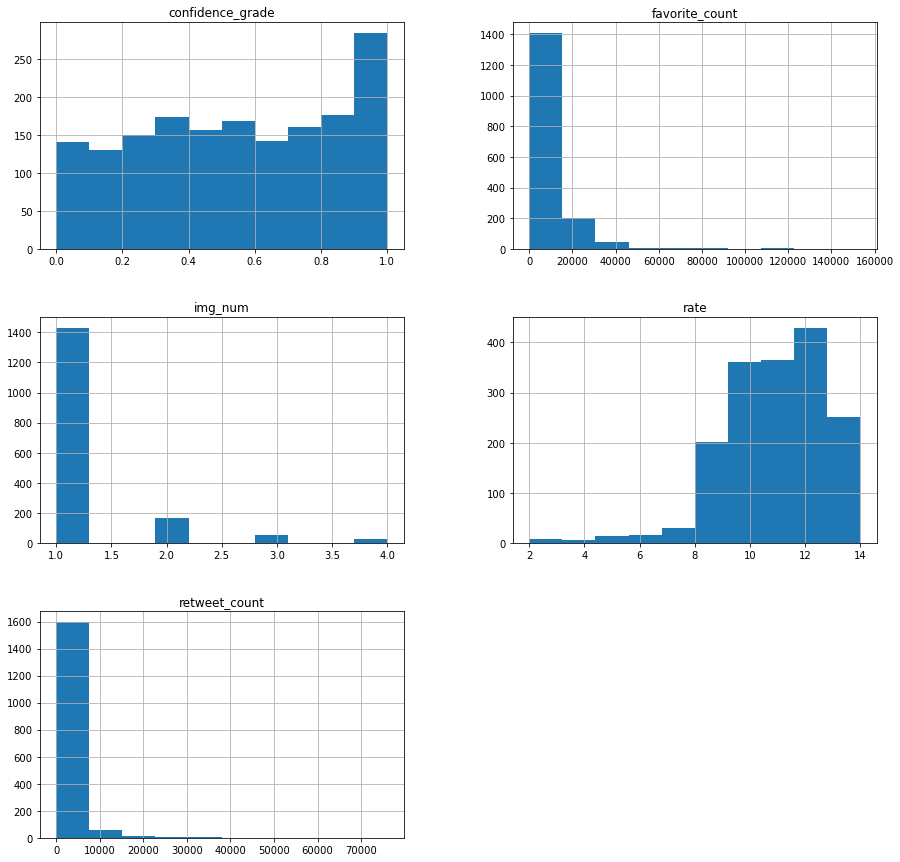

In [564]:
df_master.hist(figsize=(15,15));

##### We notice the following:
- `confidence_grade` more skewed to the left. Around `300 observation` has `1.0` confidence grade.
- `favorite_count` most of observation about `1400 observation` has favorite_count between `0: 10000` , and less than 
`100 observation` has favorite_count between `30000:50000`.
- `retweet_count` most of observation about `1600 observation` has retweet_count between `0: 8000`, and less than 
`100 observation` has retweet _count between `8000: 12000`.
- `rate` most of observation has rate between `9:14`.
- `img_num` most of observation (`1400 observation`) has only `1 photo`.

### Research Question  (What is the type of correlation between favorite_count And retweet_count? )

Correlation Between favorite_count And retweet_count =  0.9310570436678284

           -->>The plot below show the correlation between favorite_count And retweet_count<<--


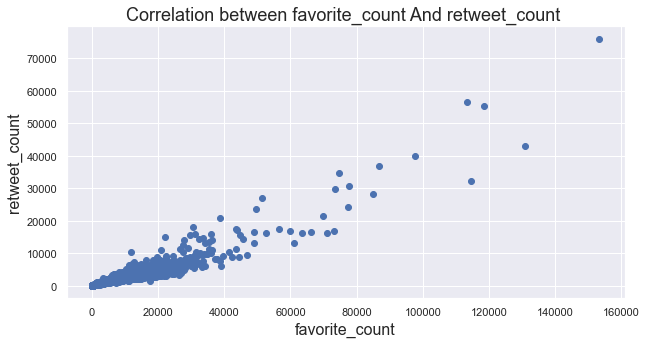

In [569]:
corr = df_master.corr()
print("Correlation Between favorite_count And retweet_count = ",corr.loc['favorite_count','retweet_count'])

print('\n           -->>The plot below show the correlation between favorite_count And retweet_count<<--')

#Visualization

plt.scatter(x=df_master['favorite_count'],y=df_master['retweet_count']);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,10)});
plt.title('Correlation between favorite_count And retweet_count ' ,fontsize = 18);
plt.xlabel('favorite_count',fontsize = 16);
plt.ylabel('retweet_count',fontsize = 16);

##### Note: There is strong relation between favorite_count And retweet_count. 
- It is a positive relationship. 
- While one increasing the other increased too. 
- That means the more favorite_count increased the more retweet_count increased.

### Research Question  (What is the distribution of dogs_stage? )

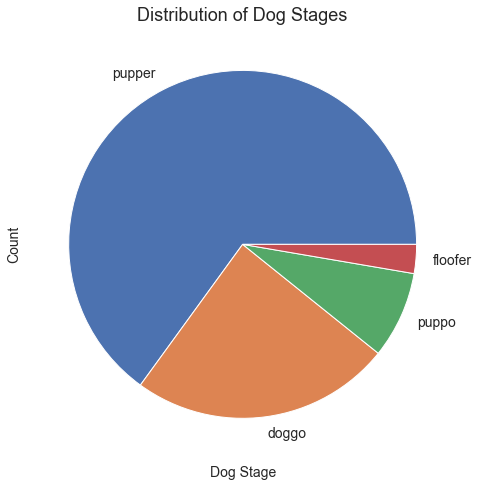

In [585]:
df_master['dogs_stage'].value_counts().plot('pie', figsize=(8,8),fontsize = 14)
plt.title("Distribution of Dog Stages",fontsize = 18)
plt.xlabel('Dog Stage',fontsize = 14)
plt.legend
plt.ylabel('Count',fontsize = 14);

##### As we can  notice that `pupper` has the highest count  of`169`, and `floofer` has the lowest count of `7`.


### Research Question  (Is there a relation between rate and tweet count? )

Correlation  between retweet_count and rate =  0.29283287114441137

           -->>The plot below show the Correlation  between retweet_count and rate <<--


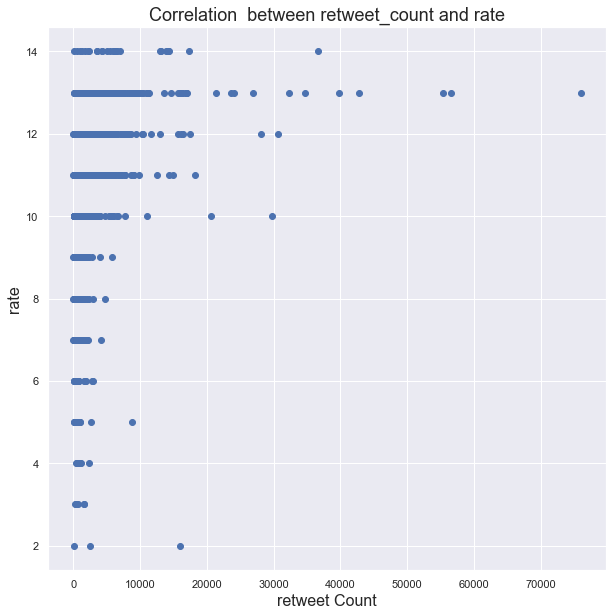

In [592]:
corr = df_master.corr()
print("Correlation  between retweet_count and rate = ",corr.loc['rate','retweet_count'])

print('\n           -->>The plot below show the Correlation  between retweet_count and rate <<--')

#Visualization

plt.scatter(x=df_master['retweet_count'],y=df_master['rate']);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,10)});
plt.title('Correlation  between retweet_count and rate',fontsize = 18);
plt.xlabel('retweet Count',fontsize = 16);
plt.ylabel('rate',fontsize = 16);

##### ===> As we can see the highest ratings do not receive the most retweets.
##### ===> There is weak relation between rate And retweet_count. 


### Research Question  (Is there a relation between rate and favorite count? )

Correlation  between favorite_count and rate =  0.39316189693676284

           -->>The plot below show the Correlation  between favorite_count and rate <<--


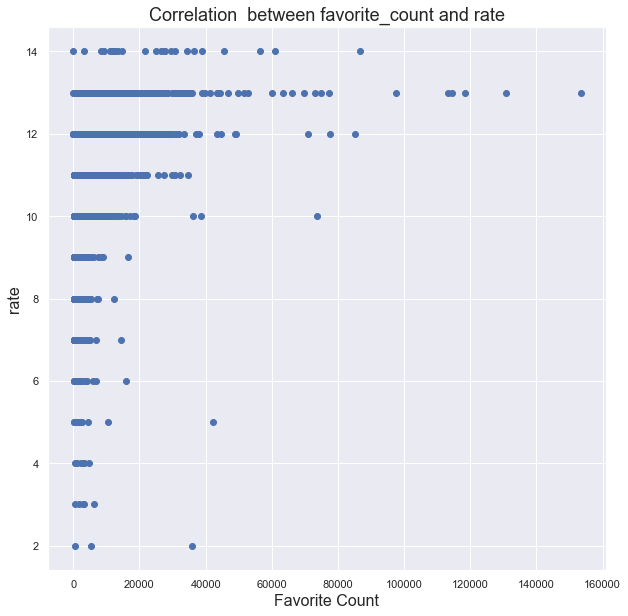

In [593]:
corr = df_master.corr()
print("Correlation  between favorite_count and rate = ",corr.loc['favorite_count','rate'])

print('\n           -->>The plot below show the Correlation  between favorite_count and rate <<--')

#Visualization

plt.scatter(x=df_master['favorite_count'],y=df_master['rate']);
#set the figure size and labels

sns.set(rc={'figure.figsize':(10,10)});
plt.title('Correlation  between favorite_count and rate',fontsize = 18);
plt.xlabel('Favorite Count',fontsize = 16);
plt.ylabel('rate',fontsize = 16);

##### ===> As we can see the highest ratings do not receive the most favorite count.
##### ===> There is weak relation between rate And favorite_count. 

# Conclusions:

- The highest rating doesn't receive the most favorite count or retweet count.
- There is strong relation between favorite count and retweet count. The one increased the othher increased too.

- Pupper has the highest frequent `(179)` and floofer has the lowest `(7)`.

- Japanese_spaniel takes the lowest rate in average = `5/10`.
- Bouvier_des_Flandres takes the highest rate in average = `13/10`. 

- Bedlington_terrier takes the highest favorite_count in average= `22731.5`.
- Bedlington_terrier takes the highest retweet_count in average = `7165`

- golden_retriever takes the highest retweet_count in total = `508771`.
- golden_retriever takes the highest favorite_count in total = `1769933`.

- the most favorite dog type is the golden_retriever with count `175`.



## Limitations:
-  This above exploration is not guaranteed 100% 
   
- This exploration gives us high expectations and it may affected by other factors that would lead to different results .